<a href="https://colab.research.google.com/github/JonathanJuradoS/busqueda/blob/main/Comparacion_Cubo3x3_BFS_ASTAR_CUBO_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🤖 Comparación de Algoritmos de Búsqueda – Cubo Rubik 3x3 (Mezcla de 3 movimientos)

Este notebook analiza la efectividad de los algoritmos BFS y A* para resolver un Cubo Rubik 3x3 mezclado con 3 movimientos aleatorios.

Se aplica una mezcla realista y se mide el número de pasos que cada algoritmo tarda en resolverlo.


In [1]:

import copy
import random
from collections import deque
from heapq import heappop, heappush
import pandas as pd

MOVIMIENTOS = ['U', 'R', 'F']

def cubo_resuelto():
    colores = ['W', 'R', 'G', 'Y', 'O', 'B']
    return [[c]*9 for c in colores]

def esta_resuelto(cubo):
    return all(len(set(cara)) == 1 for cara in cubo)

def aplicar_movimiento_U(cubo):
    nuevo = copy.deepcopy(cubo)
    original = cubo[0]
    nuevo[0] = [original[6], original[3], original[0],
                original[7], original[4], original[1],
                original[8], original[5], original[2]]
    L, F, R, B = cubo[4], cubo[2], cubo[1], cubo[5]
    nuevo[4][0:3] = B[0:3]
    nuevo[2][0:3] = L[0:3]
    nuevo[1][0:3] = F[0:3]
    nuevo[5][0:3] = R[0:3]
    return nuevo

def aplicar_movimiento_R(cubo):
    nuevo = copy.deepcopy(cubo)
    original = cubo[1]
    nuevo[1] = [original[6], original[3], original[0],
                original[7], original[4], original[1],
                original[8], original[5], original[2]]
    U, F, D, B = cubo[0], cubo[2], cubo[3], cubo[5]
    nuevo[0][2], nuevo[0][5], nuevo[0][8] = F[2], F[5], F[8]
    nuevo[2][2], nuevo[2][5], nuevo[2][8] = D[2], D[5], D[8]
    nuevo[3][2], nuevo[3][5], nuevo[3][8] = B[6], B[3], B[0]
    nuevo[5][0], nuevo[5][3], nuevo[5][6] = U[8], U[5], U[2]
    return nuevo

def aplicar_movimiento_F(cubo):
    nuevo = copy.deepcopy(cubo)
    original = cubo[2]
    nuevo[2] = [original[6], original[3], original[0],
                original[7], original[4], original[1],
                original[8], original[5], original[2]]
    U, R, D, L = cubo[0], cubo[1], cubo[3], cubo[4]
    nuevo[0][6], nuevo[0][7], nuevo[0][8] = L[8], L[5], L[2]
    nuevo[4][2], nuevo[4][5], nuevo[4][8] = D[0], D[1], D[2]
    nuevo[3][0], nuevo[3][1], nuevo[3][2] = R[6], R[3], R[0]
    nuevo[1][0], nuevo[1][3], nuevo[1][6] = U[8], U[7], U[6]
    return nuevo

def aplicar_movimiento_realista(cubo, mov):
    if mov == 'U':
        return aplicar_movimiento_U(cubo)
    elif mov == 'R':
        return aplicar_movimiento_R(cubo)
    elif mov == 'F':
        return aplicar_movimiento_F(cubo)
    return cubo

def mezclar_cubo_realista_completo(cubo, pasos=3):
    movimientos = []
    estado = copy.deepcopy(cubo)
    for _ in range(pasos):
        mov = random.choice(MOVIMIENTOS)
        estado = aplicar_movimiento_realista(estado, mov)
        movimientos.append(mov)
    return estado, movimientos


In [2]:

def bfs(cubo_inicio, max_depth=10):
    visitados = set()
    cola = deque([(cubo_inicio, [])])
    while cola:
        estado, camino = cola.popleft()
        clave = str(estado)
        if clave in visitados or len(camino) > max_depth:
            continue
        visitados.add(clave)
        if esta_resuelto(estado):
            return camino
        for mov in MOVIMIENTOS:
            nuevo_estado = aplicar_movimiento_realista(estado, mov)
            cola.append((nuevo_estado, camino + [mov]))
    return []

def heuristica(cubo):
    return sum([9 - cara.count(cara[4]) for cara in cubo])

def a_star(cubo_inicio, max_depth=10):
    visitados = set()
    heap = []
    heappush(heap, (heuristica(cubo_inicio), 0, cubo_inicio, []))
    while heap:
        h, costo, estado, camino = heappop(heap)
        clave = str(estado)
        if clave in visitados or len(camino) > max_depth:
            continue
        visitados.add(clave)
        if esta_resuelto(estado):
            return camino
        for mov in MOVIMIENTOS:
            nuevo_estado = aplicar_movimiento_realista(estado, mov)
            nuevo_camino = camino + [mov]
            g = len(nuevo_camino)
            f = g + heuristica(nuevo_estado)
            heappush(heap, (f, g, nuevo_estado, nuevo_camino))
    return []


In [3]:

# Ejecutar comparación con mezcla de 3 movimientos
cubo_base = cubo_resuelto()
mezclado, secuencia = mezclar_cubo_realista_completo(cubo_base, pasos=3)

camino_bfs = bfs(mezclado, max_depth=10)
camino_astar = a_star(mezclado, max_depth=10)

print("Secuencia de mezcla:", secuencia)
print("BFS - pasos:", len(camino_bfs), " | Solución:", camino_bfs)
print("A*  - pasos:", len(camino_astar), " | Solución:", camino_astar)


Secuencia de mezcla: ['R', 'F', 'F']
BFS - pasos: 9  | Solución: ['F', 'F', 'F', 'F', 'F', 'F', 'R', 'R', 'R']
A*  - pasos: 9  | Solución: ['F', 'F', 'F', 'F', 'F', 'F', 'R', 'R', 'R']


## 🖼️ Visualización inicial, paso a paso y final del Cubo Rubik 3x3

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


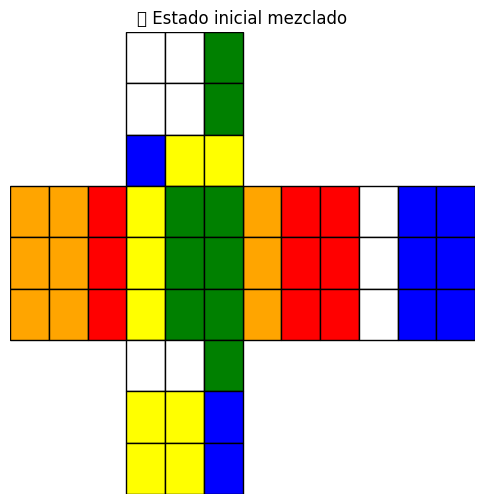

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


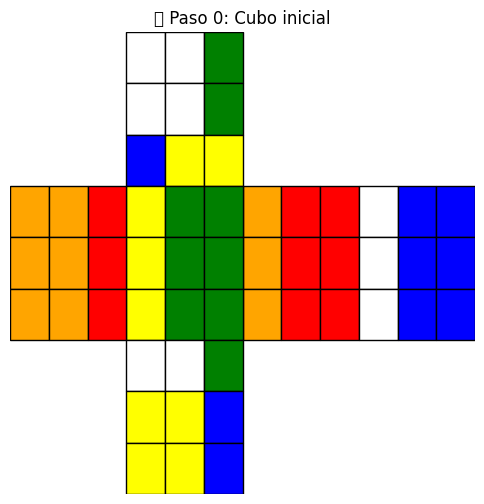

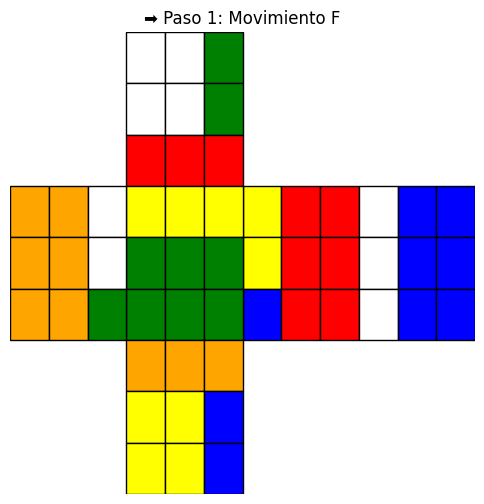

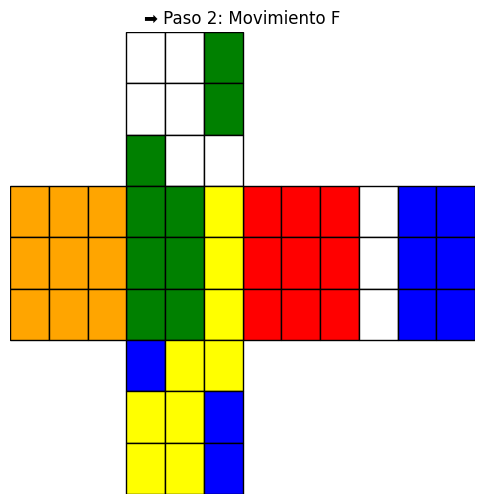

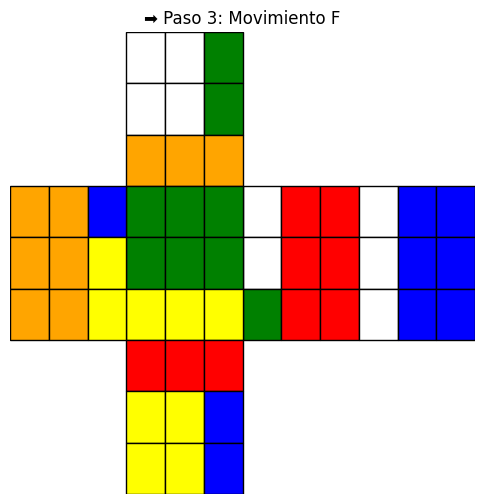

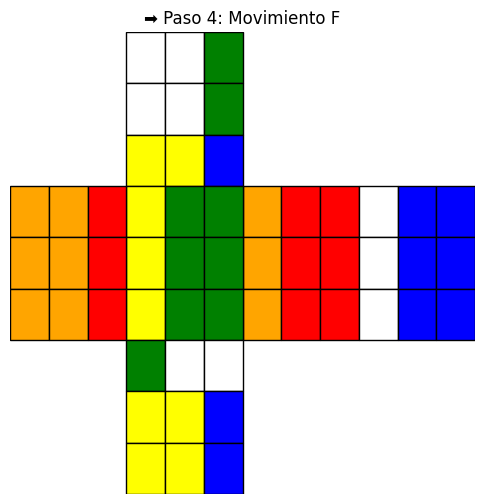

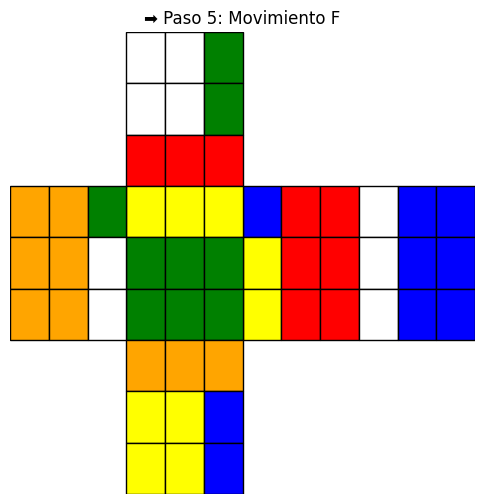

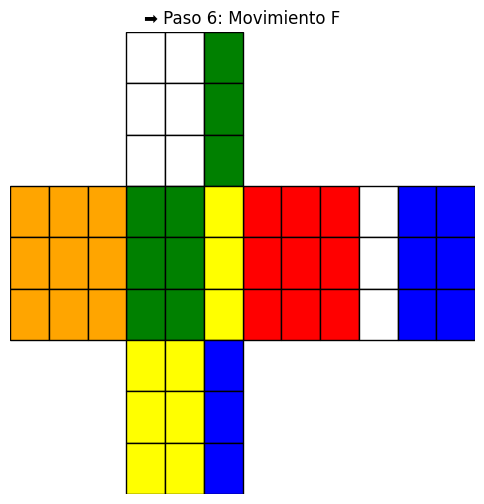

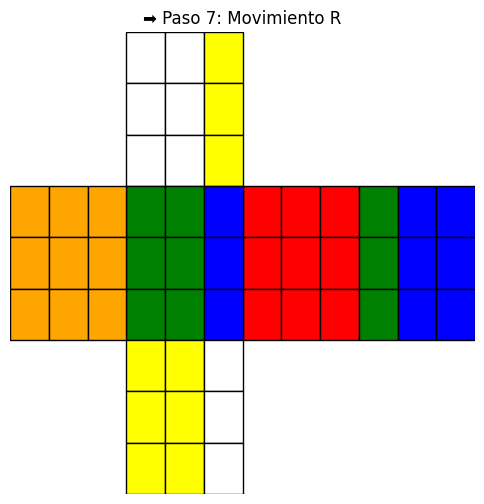

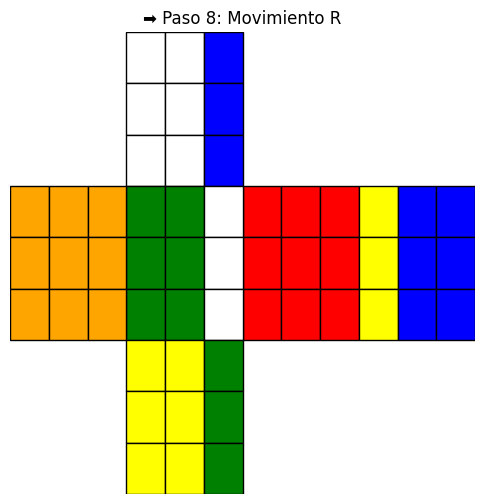

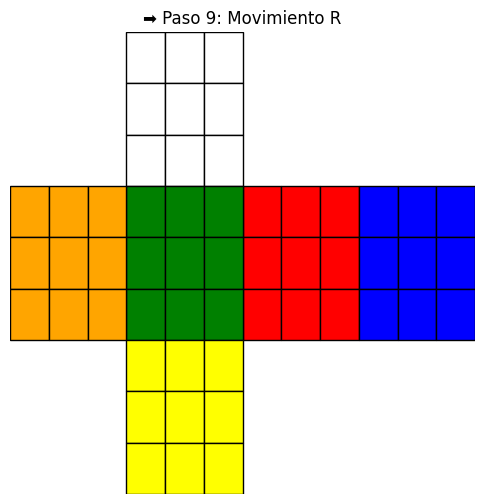

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


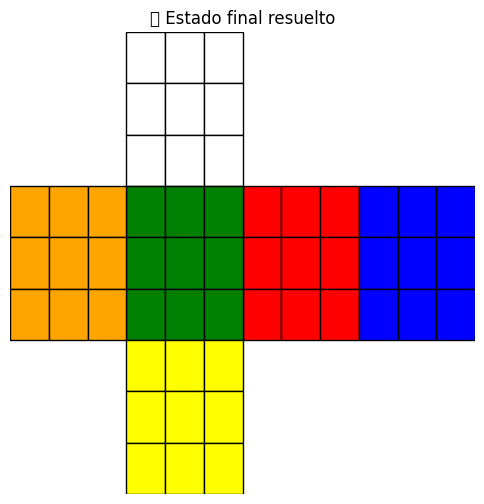

In [4]:

import matplotlib.pyplot as plt

def dibujar_cubo(cubo, titulo="Cubo Rubik 3x3"):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.axis('off')
    colores_rgb = {
        'W': 'white', 'R': 'red', 'G': 'green',
        'Y': 'yellow', 'O': 'orange', 'B': 'blue'
    }
    posicion = {
        'U': (3, 0), 'L': (0, 3), 'F': (3, 3),
        'R': (6, 3), 'B': (9, 3), 'D': (3, 6)
    }
    nombres = ['U', 'R', 'F', 'D', 'L', 'B']
    cara_map = dict(zip(nombres, cubo))
    for nombre, cara in cara_map.items():
        x0, y0 = posicion[nombre]
        for i in range(3):
            for j in range(3):
                val = cara[i * 3 + j]
                color = colores_rgb.get(val, 'gray')
                rect = plt.Rectangle((x0 + j, y0 + i), 1, 1, facecolor=color, edgecolor='black')
                ax.add_patch(rect)
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 9)
    ax.set_title(titulo)
    plt.gca().invert_yaxis()
    plt.show()

# Mostrar estado inicial mezclado
dibujar_cubo(mezclado, "🔁 Estado inicial mezclado")

# Aplicar solución A* paso a paso
estado = copy.deepcopy(mezclado)
dibujar_cubo(estado, "🎬 Paso 0: Cubo inicial")
for paso, mov in enumerate(camino_astar, 1):
    estado = aplicar_movimiento_realista(estado, mov)
    dibujar_cubo(estado, f"➡️ Paso {paso}: Movimiento {mov}")

# Mostrar cubo resuelto
dibujar_cubo(estado, "✅ Estado final resuelto")


## 🧊 Visualización 3D del Cubo Mezclado y Resuelto

In [5]:

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_cubo_rubik_3d(cubo, titulo):
    import matplotlib.pyplot as plt
    colores = {
        'W': 'white', 'Y': 'yellow', 'R': 'red',
        'O': 'orange', 'G': 'green', 'B': 'blue'
    }

    def add_face(ax, face_origin, face_normal, cara, axis1, axis2):
        for i in range(3):
            for j in range(3):
                square = []
                for dx, dy in [(0, 0), (1, 0), (1, 1), (0, 1)]:
                    p = [0, 0, 0]
                    p[axis1] = face_origin[axis1] + i + dx
                    p[axis2] = face_origin[axis2] + j + dy
                    p[face_normal] = face_origin[face_normal]
                    square.append(p)
                color = colores.get(cara[i*3 + j], 'gray')
                poly = Poly3DCollection([square])
                poly.set_facecolor(color)
                poly.set_edgecolor('black')
                ax.add_collection3d(poly)

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(titulo)
    ax.set_xlim([0, 3])
    ax.set_ylim([0, 3])
    ax.set_zlim([0, 3])
    ax.set_box_aspect([1,1,1])
    ax.axis('off')

    caras = cubo
    add_face(ax, [0, 0, 3], 2, caras[0], 0, 1)  # U
    add_face(ax, [0, 0, 0], 2, caras[3], 0, 1)  # D
    add_face(ax, [0, 3, 0], 1, caras[2], 0, 2)  # F
    add_face(ax, [0, 0, 0], 1, caras[5], 0, 2)  # B
    add_face(ax, [3, 0, 0], 0, caras[1], 1, 2)  # R
    add_face(ax, [0, 0, 0], 0, caras[4], 1, 2)  # L

    plt.tight_layout()
    plt.show()


/tmp/ipython-input-5-2853170134.py:43: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


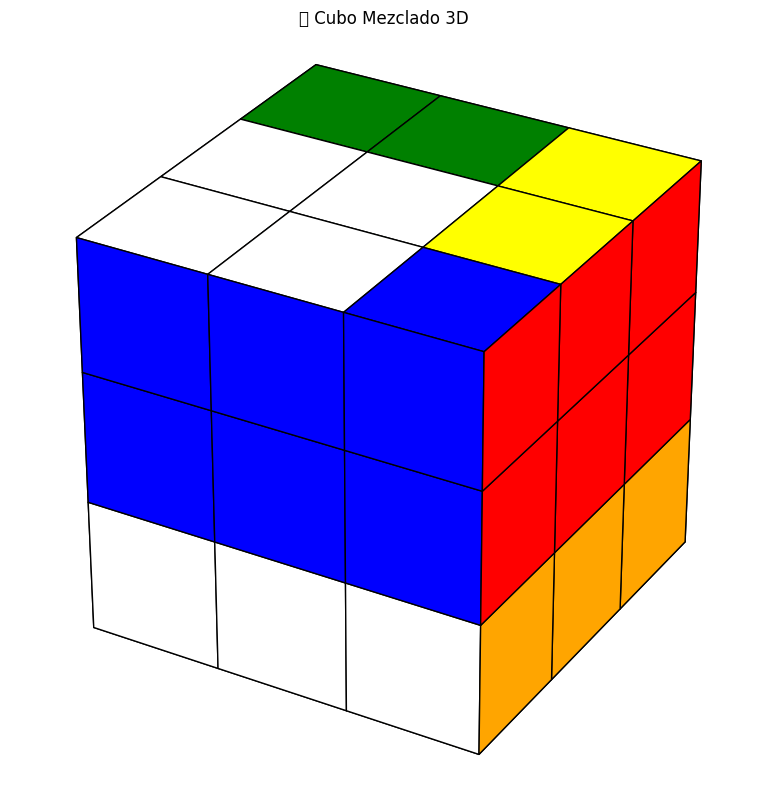

/tmp/ipython-input-5-2853170134.py:43: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


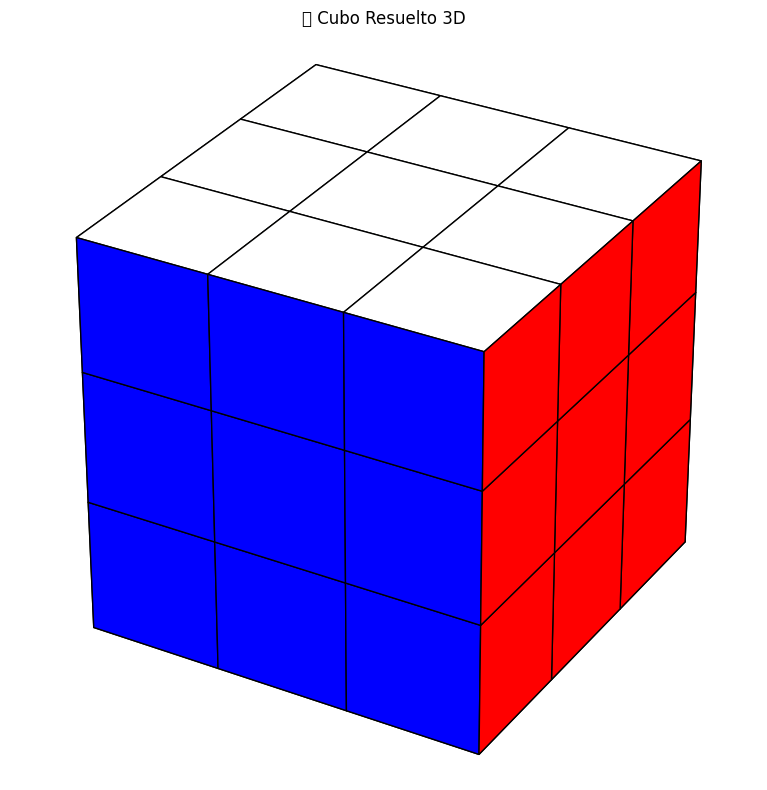

In [6]:

# 🔁 Mostrar cubo mezclado
plot_cubo_rubik_3d(mezclado, "🔁 Cubo Mezclado 3D")

# ✅ Mostrar cubo resuelto después de aplicar A*
estado_final = copy.deepcopy(mezclado)
for mov in camino_astar:
    estado_final = aplicar_movimiento_realista(estado_final, mov)
plot_cubo_rubik_3d(estado_final, "✅ Cubo Resuelto 3D")
